<a href="https://colab.research.google.com/github/AuraFrizzati/GoogleCloud-Terraform-EDX-course/blob/main/04_Organising_and_Reusing_Configurations_with_Terraform_Modules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[04] Organising and Reusing Configuration with Terraform Modules**

You will explore what **modules** are, how to use them from a **public registry**, how to use modules to **reuse configurations**, and **parameterise configurations using input variables**. You will also explore how to **use output values to access resource attributes outside of the module**.

Upon completing this module you will be able to

- Define **Terraform Modules**
- Use modules to **reuse configurations**.
- Use modules from the **public registry**.
- Use **input variables** to **parameterize configurations**.
- Use **output values** to **access resource attributes outside the module**

**Abstracting** and **modularising your code** is a common practice in the programming world.

As your infrastructure grows, so does your codebase and your team will have to spend a fair amount of time understanding the code, changing it, testing it and deploying it.

**DRY** is a **software development principle** that stands for **Don't Repeat Yourself**. We will explore how **Terraform** implements the DRY principle using **modules**. With modules, you can **group set of resources together** so you can reuse them later. To update the code, you only need to do it in one location (the module).

## **4.1: Introduction to Terraform modules**

### **Problem: Updating repeated code**

Let's say you must create a web server on a custom network. Typical attributes that represent the web server include: Machine type, VM image, static IP address, Google Service Account.

The associated code to deploy a server with these attributes is similar to that shown in this example:

```
resource "google_compute_instance" "serverVM" {
  # All necessary parameters defined
  machine_type = "f1_micro"
  ...
}

resource "google_compute_address" "static_ip" {
  ...
}

resource "google_compute_disk" "server_disk" {
  ...
}

resource "google_service_account" "server_disk" {
  ...
}
```

### **Disadvantages of code repetition**
What if you want to deploy several servers of the same kind?

You might have to manually copy the code:



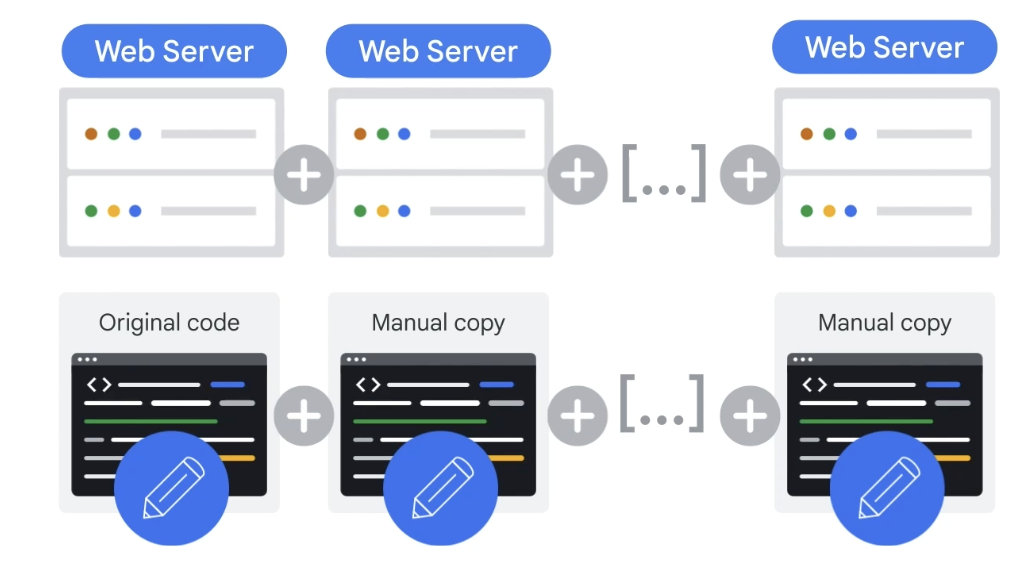

If you want to manually update an attribute for all the servers, you have to find and update the attribute in every server occurrence.

- **Unmanageable**: As new resources are added, the code becomes bigger, unmanageable and harder to read
- **Error prone**: copying the code becomes a cumbersome process, where every little change has to be applied error free across all environments
- **Inefficient**: the code becomes inefficient because similar duplicated blocks can cause **discrepancies** when updated

### **Solution: Create modules**

- In the programming world, disadvantages of code repetition are addressed with the **Don't Repeat Yourself** (**DRY**) **principle**. Rather than repearting the same block of code multiple times, replace it with **abstraction** to **avoid redundancy**. This practice encourages building efficient code that is readable and reusable.

- In general purpose **programming languages** (e.g. Java, Ruby and Python) **functions** are used to **implement the DRY principle**.

- In **Terraform**, you can place your **reusable code inside a module** and recycle it in multiple places

In the example, we can define the reusable code in a module named server, so that any changes you make to the module are reflected across all the environments where you plan to reuse it:

```
resource "google_compute_instance" "serverVM" {

  # All necessary parameters defined
  machine_type = "f1-micro"
  boot_disk {
    initialize_params {
      image = "debian-cloud/debian-9"
    }
  }
}


resource "google_compute_address" "static_ip" {
  ...
}

resource "google_compute_disk" "server_disk" {
  ...
}

resource "google_service_account" "server_disk" {
  ...
}
```

### **A module is a collection of configuration files**

- One or more **Terraform configuration files** (`.tf`) in a **directory** can form a module

- Modules let you **group a set of resources together** and **reuse them** later. They can be **referenced** from other modules.

- The **root module** consists of `.tf` files that are stored in your **working directory** where you run `terraform plan` or `terraform apply`. The root module is where **other modules** and **resources** are **instantiated**.

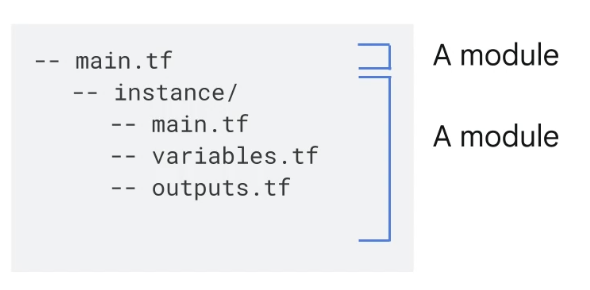

### **Write your first module**

- In this example, let's create two modules, `server` and `network`.
- Each directory has its own `main.tf` file

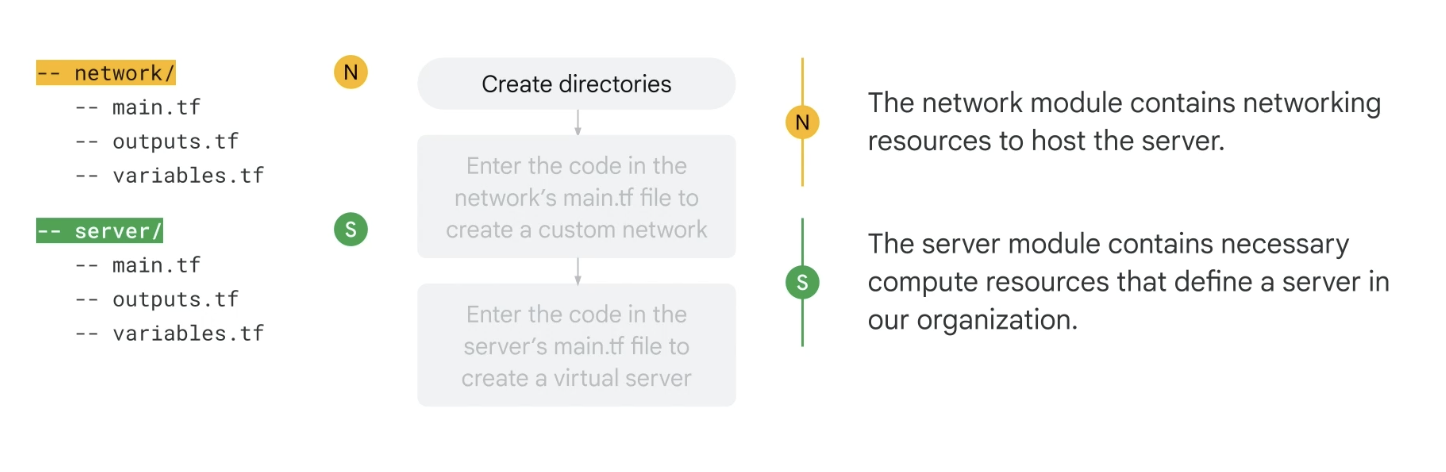

- Enter the code in the `main.tf` file to create a custom network and a custom virtual server, respectively:

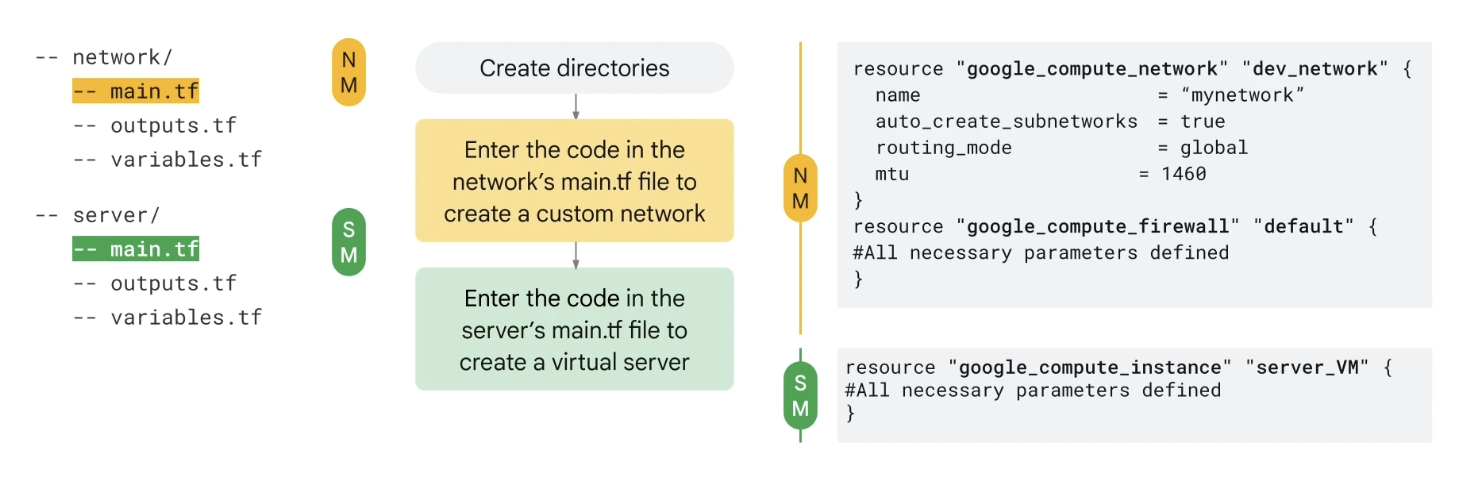

These modules do not create directly infrastructure resources. These **modules** are **instantiated** when they are called with the `terraform apply` command.

## **4.2: Modules Use Cases & Benefits**

## **Module use cases**

- **Modularise code**: when you want to organise your **Terraform configuration** in modules, so that it's **readable** and **manageable**.
  - Having one single Terraform configuration file to manage your entire cloud environment is challenging and the code will be unreadable. As your business scales, your code will to.
  - You should partition your code into reasonable modules so that is readable and easy to manage

- **Eliminare repetition**: when a fair bit of code is repeated multiple times.

- **Standardise resources**: when a set of resources has to be created in a specific way.
  - For example, if you want to deploy database servers with encrypted disks, you can ensure encryption by hard-coding the encryption configuration in a module. This module can then be called when a disk has to be created

### **Benefits of using modules**

- **Readable**: modules eliminate many lines of code with a call to the source module

- **Reusable**: you can use modules to write a code once and re-use it multiple times across various environments

- **Abstract**: by using modules, you can separate configurations into **logical units**, **re-using the dependencies** and making them **easier to debug**

- **Consistent**: modules help you **package the configuration** of a **set of resources**, enabling consistent resource replication





## **4.3: Re-use Configurations with Modules**

After modules are created, they need to be **called** from the **parent** `main.tf` file.

### **Calling the module to reuse your configuration**

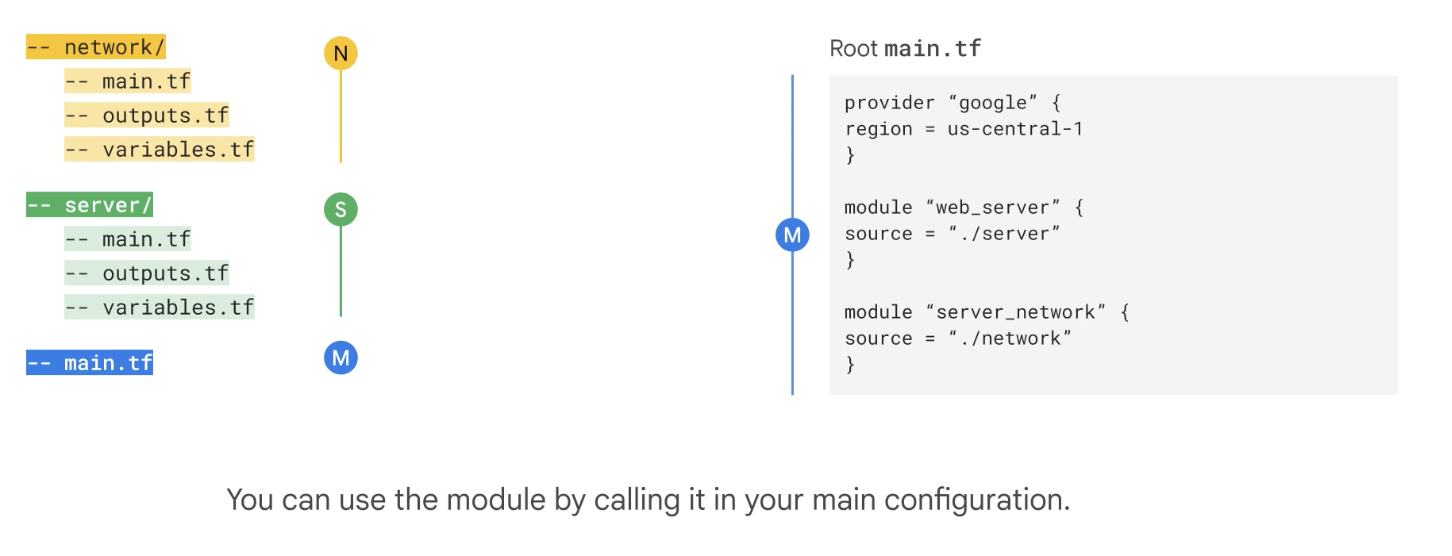

- In the example above, the **parent** `main.tf` is the **calling module.**. It uses the `source` argument to call the `server` and the `network` modules
- Run `terraform init` to **download** any **modules referenced** by a configuration

### **`source` meta-argument**
- `source` is a **meta-argument**, whose value provides the **path to the configuration code**

- The `sorce` value can be a **local path** (within the **root directory**) or **remote path** to a **module source** that Terraform **downloads**

- There are several **supported remote source types**, such as **Terraform Registry**, **GitHub**, **Bitbucket**, **HTTP URLs** and **Cloud Storage buckets**.

- **Syntax** for **calling a module**:

```
module "<NAME>" {
  source = "<source_location>"
  [CONFIG ...]
}
```

### **Module source: Local path**

- **Local path** is used to **reference a module stored within the same directory as the calling module**
- Local paths **do not require any installation**
- The files are locally referenced from the child modules to the parent module directly, so n**o explicit update is required**

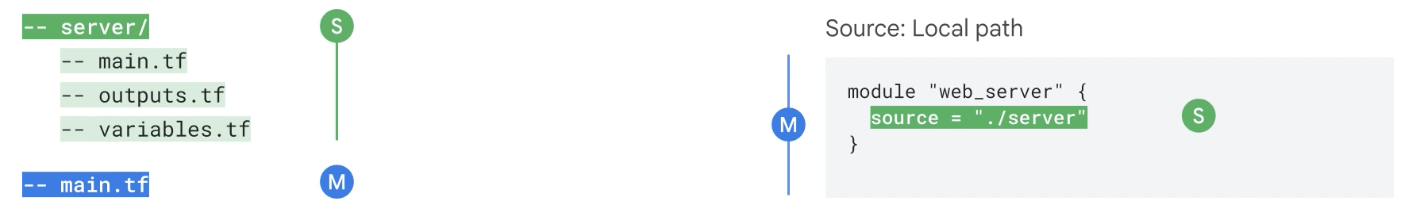

### **Module source: Terraform Registry**

- **Terraform Registry** contains a **directory of publicly available modules** for various infrastructure components (including load balancers, SQL instances etc)
- These publicly available modules are incredibly useful for complex deployment
- To **avoid any unwanted changes** to your **Terraform configuration**, it is recommended that you use **version constraints**. The version string allows Terraform to **automatically upgrade the module to new patch releases**, while still **keeping the source target**. Only the modules downloaded from the Terraform Registry support this constraint

- Example: https://registry.terraform.io/modules/terraform-google-modules/vm/google/latest/submodules/compute_instance


```
module "web_server" {
    source = "terraform-google-modules/vm/google//modules/compute_instance"
    version = "0.0.5"
}
```

### **Module source: GitHub**

- After Terraform Registry, the most commonly used Terraform remote source is the GitHub repository

- You can directly enter the GitHub URL

- Example: https://github.com/terraform-google-modules/terraform-google-vm/tree/master/modules/compute_instance

```
module VMserver {
  source = "github.com/terraform-google-modules/terraform-google-vm//modules/compute_instance"
}
```

## **4.4: Variables and Outputs**